In [296]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow as tf
print(tf.__version__)

2.6.2


In [297]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import os
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input,Activation, Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Concatenate, ReLU, LeakyReLU, GlobalAveragePooling2D
from keras.models import Model
#from keras.optimizers import Adam
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import tensorflow.keras
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,
    Flatten, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D, add)
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
# from keras.engine import Layer, InputSpec
from tensorflow.keras.layers import Layer, InputSpec
# from keras.engine.topology import get_source_inputs
from tensorflow.keras.utils import get_source_inputs

import numpy as np
import cv2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, GlobalAveragePooling2D, Dropout, Reshape
from tensorflow.keras import optimizers
import os
from tensorflow.keras import applications
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from imgaug import augmenters as iaa
from tqdm import tqdm
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
optimizers.RMSprop
optimizers.Adam
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.activations import selu
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import os
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input,Activation, Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Concatenate, ReLU, LeakyReLU, GlobalAveragePooling2D
from keras.models import Model
#from keras.optimizers import Adam
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from imgaug import augmenters as iaa
from tqdm import tqdm
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
optimizers.RMSprop
optimizers.Adam
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.activations import selu
from tensorflow import keras 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import cv2
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input,Activation, Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Concatenate, ReLU, LeakyReLU, GlobalAveragePooling2D
from keras.models import Model
#from keras.optimizers import Adam
import os, sys, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from imgaug import augmenters as iaa
from tqdm import tqdm
from tensorflow.keras import optimizers
optimizers.RMSprop
optimizers.Adam
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [298]:
all_data= pd.read_csv('/Users/lina/Downloads/human-protein-atlas-image-classification/train.csv')
path_to_train = '/Users/lina/Downloads/human-protein-atlas-image-classification/train'

In [299]:
#dataframe, _ = train_test_split(all_data, test_size = 0.5, random_state=42)

In [300]:
dataframe=all_data

In [301]:
dataframe = dataframe.reset_index()

In [302]:
dataframe['aug'] = 0

In [303]:
dataframe.head()

,index,Id,Target,aug
0,0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,0
1,1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,0
2,2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0
3,3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0
4,4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0


In [304]:
import itertools
labels = [x.split() for x in dataframe.Target.tolist()]
labels = list(itertools.chain(*labels))
flat_labels =[int(l) for l in labels]

flat_labels =np.array(flat_labels)
(label, counts) = np.unique(flat_labels, return_counts=True)
list(zip(label, counts))

[(0, 12885),
 (1, 1254),
 (2, 3621),
 (3, 1561),
 (4, 1858),
 (5, 2513),
 (6, 1008),
 (7, 2822),
 (8, 53),
 (9, 45),
 (10, 28),
 (11, 1093),
 (12, 688),
 (13, 537),
 (14, 1066),
 (15, 21),
 (16, 530),
 (17, 210),
 (18, 902),
 (19, 1482),
 (20, 172),
 (21, 3777),
 (22, 802),
 (23, 2965),
 (24, 322),
 (25, 8228),
 (26, 328),
 (27, 11)]

In [305]:
#for elm in flat_labels:
#    print ( elm )
import numpy as np
arr = np.array(label)
element = np.where(arr == 25)
print(element)
print(element[0][0])
#print(label[element[0][0]])

(array([25]),)
25


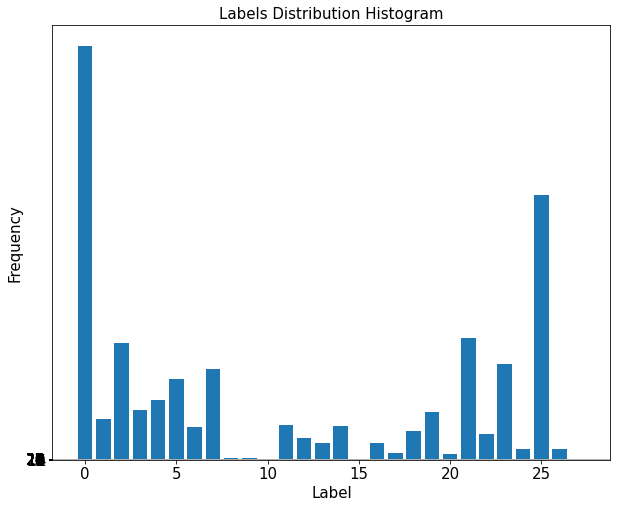

In [306]:
plt.figure(figsize=[10,8])
plt.bar(label, height=counts)


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(label,fontsize=15) 
plt.ylabel('Frequency',fontsize=15)
plt.title('Labels Distribution Histogram',fontsize=15)
plt.show()

In [307]:
lb_to_balanced = [1,2, 3, 4,5,6, 7  ,    8,    9,  10, 11 ,12,   13,14,  15,  16,  17, 
                  18, 19 , 20, 21,22, 23,24,25 , 26, 27]
lb_to_added =    [11000,9000,9000,9000
                 ,10000,9000,9000, 11000
                , 11000,10000 ,9000, 11000
                ,12000,10000 ,11000,10000 , 11000
                ,10000 ,11000,11000, 9000
                 , 11000, 9000, 11000, 5000,11000, 11000]


#lb_to_balanced = [1,2, 3, 4,5,6, 7  ,    8,    9,  10, 11 ,12,   13,14,  15,  16,  17,  18, 19 , 20, 21,22, 23,24,25 
                 # , 26, 27]
#lb_to_added =    [5000,5000,5000,5000
                 # ,5000,5000,5000, 5000
                 # , 5000,5000 ,5000, 5000
                  #,6000,5000 ,5000,5000 , 5000
                  #,5000 ,5000,5000, 5000
                  #, 5000, 5000, 5000, 2000,5000, 5000]






#lb_to_balanced = [1,2, 3, 4,5,6, 7  ,    8,    9,  10, 11 ,12,   13,14,  15,  16,  17,  18, 19 , 20, 21,22, 23,24
              #    , 26, 27]
#lb_to_added =    [5000,5000,5000,5000
                 # ,5000,5000,5000, 5000
                 # , 5000,5000 ,5000, 5000
                 # ,6000,5000 ,5000,5000 , 5000
                 # ,5000 ,5000,5000, 5000
                 # , 5000, 5000, 5000,5000, 5000]



def generate_large_list(ls, size):
    n_copies = size // len(ls)
    excess = size % len(ls)

    result = sorted([element 
                     for i in range(n_copies) 
                     for element in ls] + ls[:excess]) 
    print(len(result))
    return result

df = dataframe.copy()
df['labels'] = [[ int(l) for l in x.split()] for x in df.Target.tolist()]
minority_files = []
targets = []
for label in lb_to_balanced:
    files = []
    for i in range(len(df)):
        if label in df.iloc[i,4]:
            files.append( df.iloc[i,1])
    size = lb_to_added[lb_to_balanced.index(label)]
    minority_files.extend( generate_large_list(files, size) )
    targets.extend([str(label) for _ in range(size)])
#     targets.extend(np.array([np.array([label]) for _ in range(size)]))


# targets = np.array(targets)
minority_dataframe = pd.DataFrame({'Id': minority_files, 'Target': targets})
minority_dataframe['aug'] = 1

dataframe = dataframe[['Id', 'Target', 'aug']]
dataframe = pd.concat([dataframe, minority_dataframe], ignore_index=True)
dataframe.shape

11000
9000
9000
9000
10000
9000
9000
11000
11000
10000
9000
11000
12000
10000
11000
10000
11000
10000
11000
11000
9000
11000
9000
11000
5000
11000
11000


(302072, 3)

In [308]:
df.head()

,index,Id,Target,aug,labels
0,0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,0,"[16, 0]"
1,1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,0,"[7, 1, 2, 0]"
2,2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,[5]
3,3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,[1]
4,4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,[18]


In [309]:
dataframe.head()

,Id,Target,aug
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0


In [310]:
labels = [x.split() for x in dataframe.Target.tolist()]
labels = list(itertools.chain(*labels))
flat_labels =[int(l) for l in labels]

flat_labels =np.array(flat_labels)
(label, counts) = np.unique(flat_labels, return_counts=True)
list(zip(label, counts))

[(0, 12885),
 (1, 12254),
 (2, 12621),
 (3, 10561),
 (4, 10858),
 (5, 12513),
 (6, 10008),
 (7, 11822),
 (8, 11053),
 (9, 11045),
 (10, 10028),
 (11, 10093),
 (12, 11688),
 (13, 12537),
 (14, 11066),
 (15, 11021),
 (16, 10530),
 (17, 11210),
 (18, 10902),
 (19, 12482),
 (20, 11172),
 (21, 12777),
 (22, 11802),
 (23, 11965),
 (24, 11322),
 (25, 13228),
 (26, 11328),
 (27, 11011)]

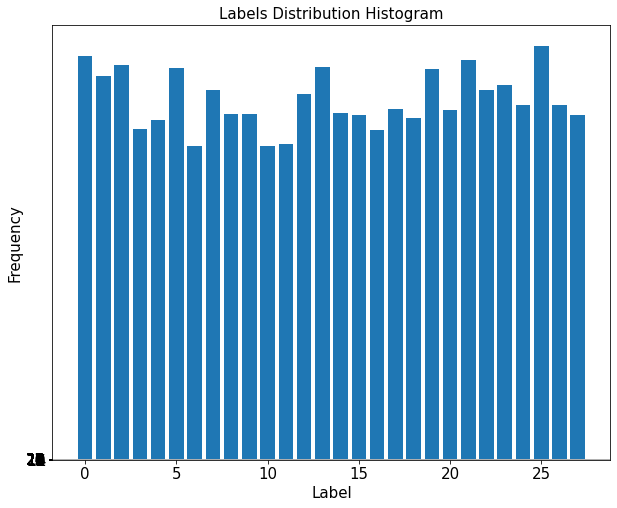

In [311]:
plt.figure(figsize=[10,8])
plt.bar(label, height=counts)


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(label,fontsize=15) 
plt.ylabel('Frequency',fontsize=15)
plt.title('Labels Distribution Histogram',fontsize=15)
plt.show()

In [312]:
train_dataset_info = []
for name, aug, labels in zip(dataframe['Id'], dataframe['aug'],
                             dataframe['Target'].str.split(' ')):
    train_dataset_info.append({
        'path':os.path.join(path_to_train, name),
        'labels':np.array([int(label) for label in labels]),
        'aug': aug})
train_dataset_info = np.array(train_dataset_info)

In [313]:
INPUT_SHAPE = (299,299,4)
#BATCH_SIZE = 10


In [314]:
from sklearn.model_selection import train_test_split
train_ids, valid_ids, train_targets, valid_target = train_test_split(
    dataframe['Id'], dataframe['Target'], test_size=0.2, random_state=42)

valid_ids, test_ids, valid_targets, test_target = train_test_split(
    valid_ids, valid_target, test_size=0.5, random_state=42)

In [315]:
print(train_ids.shape, valid_ids.shape, test_ids.shape)

(241657,) (30207,) (30208,)


In [316]:
class data_generator:
    def create_train(dataset_info, batch_size, shape, augument=True):
        assert shape[2] == 4
        while True:
            random_indexes = np.random.choice(len(dataset_info), batch_size)
            batch_images = np.empty((batch_size, shape[0], shape[1], shape[2]))
            batch_labels = np.zeros((batch_size, 28))
            for i, idx in enumerate(random_indexes):
                image = data_generator.load_image(
                    dataset_info[idx]['path'], shape)   
                if dataset_info[idx]['aug']==1:
                    image = data_generator.augment(image)
                batch_images[i] = image
                batch_labels[i][dataset_info[idx]['labels']] = 1
            yield batch_images, batch_labels
    def load_image(path, shape):
        R = np.array(Image.open(path+'_red.png'))
        G = np.array(Image.open(path+'_green.png'))
        B = np.array(Image.open(path+'_blue.png'))
        Y = np.array(Image.open(path+'_yellow.png'))
        #image = np.stack((
            #R/2 + Y/2, 
            #G/2 + Y/2, 
            #B),-1)
        image = np.stack((R,G,B,Y),-1)
        image = cv2.resize(image, (shape[0], shape[1]))
        image = np.divide(image, 255)
        return image  
                
            
    def augment(image):
        augment_img = iaa.Sequential([
            iaa.OneOf([
                iaa.Affine(rotate=0),
                iaa.Affine(rotate=90),
                iaa.Affine(rotate=180),
                iaa.Affine(rotate=270),
                iaa.Fliplr(0.5),
                iaa.Flipud(0.5),
            ])], random_order=True)
        
        image_aug = augment_img.augment_image(image)
        return image_aug
    
   

In [317]:
from keras import backend as K
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [318]:
def preprocess_input(x):
        x /= 255.
        x -= 0.5
        x *= 2.
        return x

def DeepYeast():

    input_shape = (299, 299, 4)
    img_input = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='conv1_1')(img_input)
    x = BatchNormalization(name='bn1_1')(x)
    x = Activation('relu', name='relu1_1')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv1_2')(x)
    x = BatchNormalization(name='bn1_2')(x)
    x = Activation('relu', name='relu1_2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='conv2_1')(x)
    x = BatchNormalization(name='bn2_1')(x)
    x = Activation('relu', name='relu2_1')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv2_2')(x)
    x = BatchNormalization(name='bn2_2')(x)
    x = Activation('relu', name='relu2_2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='conv3_1')(x)
    x = BatchNormalization(name='bn3_1')(x)
    x = Activation('relu', name='relu3_1')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv3_2')(x)
    x = BatchNormalization(name='bn3_2')(x)
    x = Activation('relu', name='relu3_2')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv3_3')(x)
    x = BatchNormalization(name='bn3_3')(x)
    x = Activation('relu', name='relu3_3')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv3_4')(x)
    x = BatchNormalization(name='bn3_4')(x)
    x = Activation('relu', name='relu3_4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pool3')(x)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(512, name='ip1')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu', name='relu4')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, name='ip2')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu', name='relu5')(x)
    x = Dropout(0.5)(x)
    x = Dense(28, name='ip3')(x)
    x = Activation('sigmoid', name='predictions')(x)

    # Create model
    model = Model(img_input, x, name='deepyeast-original')
    
    return model

In [319]:
# load pre-trained network
model = DeepYeast()
tf.keras.backend.clear_session()
model.summary()

Model: "deepyeast-original"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 4)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 299, 299, 64)      2368      
_________________________________________________________________
bn1_1 (BatchNormalization)   (None, 299, 299, 64)      256       
_________________________________________________________________
relu1_1 (Activation)         (None, 299, 299, 64)      0         
_________________________________________________________________
conv1_2 (Conv2D)             (None, 299, 299, 64)      36928     
_________________________________________________________________
bn1_2 (BatchNormalization)   (None, 299, 299, 64)      256       
_________________________________________________________________
relu1_2 (Activation)         (None, 299, 299, 64

In [320]:
train_generator = data_generator.create_train(
    train_dataset_info[train_ids.index], 32, INPUT_SHAPE, augument=True)
validation_generator = data_generator.create_train(
    train_dataset_info[valid_ids.index], 32, INPUT_SHAPE, augument=False)
test_generator = data_generator.create_train(
    train_dataset_info[test_ids.index], 32, INPUT_SHAPE, augument=False)

In [321]:
#steps_by_epochs = len(train_ids) //80
#steps_by_epochs

In [322]:
steps_by_epochs = 800

In [ ]:
tf.keras.backend.clear_session()

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
#             patience=5, min_lr=0.001, mode='min')
# reduce_lr = ReduceLROnPlateau(monitor='acc_loss', factor=0.5,
#                              patience=5, min_lr=0.001, mode='max')

earlystopper = tf.keras.callbacks.EarlyStopping( 
    monitor='val_loss', mode='min')

# patience=10, verbose=0,


def scheduler(epoch, lr):
    i = 25
    if epoch % i == 0:
        return lr
    else:
        return lr * 0.5

#model.compile('optimize', 'binary_crossentropy', metrics=[tf.keras.metrics.AUC(multi_label=True),'accuracy',f1_m,recall_m,precision_m])
#model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
#run = wandb.init(entity='ayush-thakur', project='hpa', job_type='train')

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)




model.compile(
    loss='binary_crossentropy', 
     optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9,  decay = 0.0005),
    metrics=[tf.keras.metrics.AUC(multi_label=True),'accuracy',f1_m,recall_m,precision_m])

hist = model.fit(train_generator, 
          epochs=80,
          steps_per_epoch=steps_by_epochs,
          validation_data=next(validation_generator),
          callbacks=[reduce_lr]
                )

Epoch 1/80
260/800 [========>.....................] - ETA: 5:27:09 - loss: 0.1919 - auc: 0.5478 - accuracy: 0.0573 - f1_m: 0.0046 - recall_m: 0.0093 - precision_m: 0.0403

In [ ]:
#steps_by_epochs = len(test_ids) //80

In [ ]:
results = model.evaluate(test_generator, batch_size=32, steps=800)

In [ ]:
results2 = model.evaluate(validation_generator, batch_size=32, steps=800)

In [ ]:
model.save('modeldeepyeast.h5')